In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/657_Project/
!ls

/content/drive/My Drive/657_Project
_Kids_In_Motion__Playground_Programming.csv


In [ ]:
df = pd.read_csv('/content/drive/My Drive/657_Project/_Kids_In_Motion__Playground_Programming.csv')

In [ ]:
df

,Borough,Park or Playground,Week Start Date,Week End date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Total Attendance
0,Staten Island,Corporal Thompson - CPI,04/17/2017,04/22/2017,0,0,80,0,0,0,0,80
1,Manhattan,Tompkins Square Park - CPI,04/18/2017,04/22/2017,0,0,0,0,350,276,0,626
2,Queens,Playground for All Children - CPI,04/30/2017,05/06/2017,260,0,120,0,470,0,420,1270
3,Manhattan,Thomas Jefferson Park,08/08/2017,08/12/2017,0,0,454,554,557,712,598,2875
4,Manhattan,White Park - CPI,08/08/2017,08/12/2017,0,0,40,35,32,85,0,192
...,...,...,...,...,...,...,...,...,...,...,...,...
5125,Manhattan,Frederick Johnson Park,08/15/2017,08/19/2017,0,0,90,108,131,100,170,599
5126,Manhattan,Poor Richard's Playground - CPI,08/15/2017,08/19/2017,0,0,0,0,0,0,0,0
5127,Manhattan,St. Catherine's Park,08/15/2017,08/19/2017,0,0,65,170,0,0,0,235
5128,Manhattan,Tompkins Square Park - CPI,08/15/2017,08/19/2017,0,652,0,745,0,0,813,2210


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Borough                 5130 non-null   object
 1   Park or Playground      5130 non-null   object
 2   Week Start Date         5130 non-null   object
 3   Week End date           5130 non-null   object
 4   Sunday's Attendance     5130 non-null   int64 
 5   Monday's Attendance     5130 non-null   int64 
 6   Tuesday's Attendance    5130 non-null   int64 
 7   Wednesday's Attendance  5130 non-null   int64 
 8   Thursday's Attendance   5130 non-null   int64 
 9   Friday's Attendance     5130 non-null   int64 
 10  Saturday's Attendance   5130 non-null   int64 
 11  Total Attendance        5130 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 481.1+ KB


In [ ]:
df.columns

Index(['Borough', 'Park or Playground', 'Week Start Date', 'Week End date',
       'Sunday's Attendance', 'Monday's Attendance', 'Tuesday's Attendance',
       'Wednesday's Attendance', 'Thursday's Attendance',
       'Friday's Attendance', 'Saturday's Attendance', 'Total Attendance'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunday's Attendance,5130.0,2.623782,26.343672,0.0,0.0,0.0,0.0,771.0
Monday's Attendance,5130.0,6.539766,40.650867,0.0,0.0,0.0,0.0,952.0
Tuesday's Attendance,5130.0,71.510526,103.294350,0.0,10.0,42.0,90.0,1434.0
Wednesday's Attendance,5130.0,76.083431,108.896976,0.0,13.0,45.0,91.0,1268.0
Thursday's Attendance,5130.0,73.171345,108.654881,0.0,11.0,45.0,90.0,1668.0
Friday's Attendance,5130.0,77.234113,109.669551,0.0,12.0,45.0,95.0,1238.0
Saturday's Attendance,5130.0,71.184795,116.790466,0.0,0.0,36.0,87.0,1400.0
Total Attendance,5130.0,378.347758,455.287405,0.0,124.0,246.0,454.0,5309.0


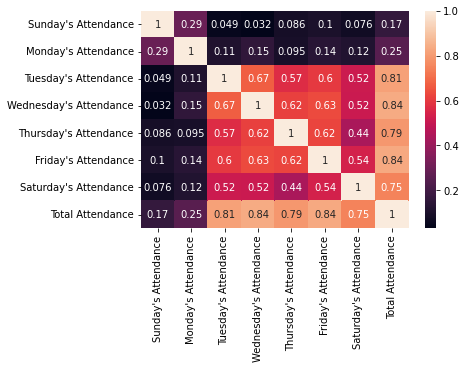

In [ ]:
core = df.corr()
sns.heatmap(core, annot=True)

In [ ]:
df = df.drop(columns=["Sunday's Attendance", "Monday's Attendance"])
df

,Borough,Park or Playground,Week Start Date,Week End date,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Total Attendance
0,Staten Island,Corporal Thompson - CPI,04/17/2017,04/22/2017,80,0,0,0,0,80
1,Manhattan,Tompkins Square Park - CPI,04/18/2017,04/22/2017,0,0,350,276,0,626
2,Queens,Playground for All Children - CPI,04/30/2017,05/06/2017,120,0,470,0,420,1270
3,Manhattan,Thomas Jefferson Park,08/08/2017,08/12/2017,454,554,557,712,598,2875
4,Manhattan,White Park - CPI,08/08/2017,08/12/2017,40,35,32,85,0,192
...,...,...,...,...,...,...,...,...,...,...
5125,Manhattan,Frederick Johnson Park,08/15/2017,08/19/2017,90,108,131,100,170,599
5126,Manhattan,Poor Richard's Playground - CPI,08/15/2017,08/19/2017,0,0,0,0,0,0
5127,Manhattan,St. Catherine's Park,08/15/2017,08/19/2017,65,170,0,0,0,235
5128,Manhattan,Tompkins Square Park - CPI,08/15/2017,08/19/2017,0,745,0,0,813,2210


In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Total Attendance","Friday's Attendance"]])
    sse.append(km.inertia_)

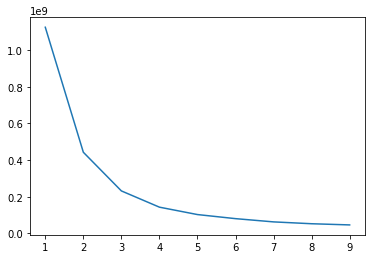

In [ ]:
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Total Attendance", "Friday's Attendance"]])
y_predicted


array([0, 2, 2, ..., 0, 1, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df


,Borough,Park or Playground,Week Start Date,Week End date,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Total Attendance,cluster
0,Staten Island,Corporal Thompson - CPI,04/17/2017,04/22/2017,80,0,0,0,0,80,0
1,Manhattan,Tompkins Square Park - CPI,04/18/2017,04/22/2017,0,0,350,276,0,626,2
2,Queens,Playground for All Children - CPI,04/30/2017,05/06/2017,120,0,470,0,420,1270,2
3,Manhattan,Thomas Jefferson Park,08/08/2017,08/12/2017,454,554,557,712,598,2875,1
4,Manhattan,White Park - CPI,08/08/2017,08/12/2017,40,35,32,85,0,192,0
...,...,...,...,...,...,...,...,...,...,...,...
5125,Manhattan,Frederick Johnson Park,08/15/2017,08/19/2017,90,108,131,100,170,599,2
5126,Manhattan,Poor Richard's Playground - CPI,08/15/2017,08/19/2017,0,0,0,0,0,0,0
5127,Manhattan,St. Catherine's Park,08/15/2017,08/19/2017,65,170,0,0,0,235,0
5128,Manhattan,Tompkins Square Park - CPI,08/15/2017,08/19/2017,0,745,0,0,813,2210,1


In [ ]:
km.cluster_centers_


array([[ 212.88754241,   43.23582162],
       [2422.54615385,  517.89230769],
       [ 855.3993135 ,  172.18993135]])

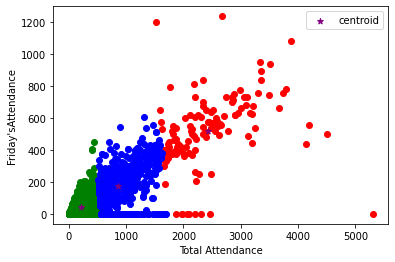

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1["Total Attendance"],df1["Friday's Attendance"],color='green')
plt.scatter(df2["Total Attendance"],df2["Friday's Attendance"],color='red')
plt.scatter(df3["Total Attendance"],df3["Friday's Attendance"],color='blue')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Total Attendance")
plt.ylabel("Friday'sAttendance")
plt.legend()

In [ ]:
sse = []
k_rng2 = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Tuesday's Attendance","Wednesday's Attendance"]])
    sse.append(km.inertia_)

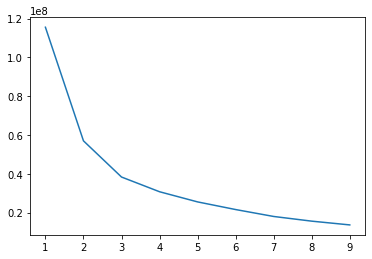

In [ ]:
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Tuesday's Attendance", "Wednesday's Attendance"]])
y_predicted


array([0, 0, 0, ..., 2, 1, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df

,Borough,Park or Playground,Week Start Date,Week End date,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Total Attendance,cluster
0,Staten Island,Corporal Thompson - CPI,04/17/2017,04/22/2017,80,0,0,0,0,80,0
1,Manhattan,Tompkins Square Park - CPI,04/18/2017,04/22/2017,0,0,350,276,0,626,0
2,Queens,Playground for All Children - CPI,04/30/2017,05/06/2017,120,0,470,0,420,1270,0
3,Manhattan,Thomas Jefferson Park,08/08/2017,08/12/2017,454,554,557,712,598,2875,1
4,Manhattan,White Park - CPI,08/08/2017,08/12/2017,40,35,32,85,0,192,0
...,...,...,...,...,...,...,...,...,...,...,...
5125,Manhattan,Frederick Johnson Park,08/15/2017,08/19/2017,90,108,131,100,170,599,2
5126,Manhattan,Poor Richard's Playground - CPI,08/15/2017,08/19/2017,0,0,0,0,0,0,0
5127,Manhattan,St. Catherine's Park,08/15/2017,08/19/2017,65,170,0,0,0,235,2
5128,Manhattan,Tompkins Square Park - CPI,08/15/2017,08/19/2017,0,745,0,0,813,2210,1


In [ ]:
km.cluster_centers_


array([[ 34.26442678,  36.31007951],
       [439.72781065, 494.21893491],
       [149.65913371, 155.56685499]])

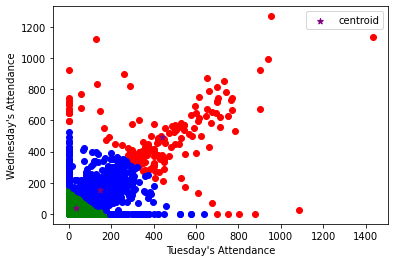

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1["Tuesday's Attendance"],df1["Wednesday's Attendance"],color='green')
plt.scatter(df2["Tuesday's Attendance"],df2["Wednesday's Attendance"],color='red')
plt.scatter(df3["Tuesday's Attendance"],df3["Wednesday's Attendance"],color='blue')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Tuesday's Attendance")
plt.ylabel("Wednesday's Attendance")
plt.legend()